# $k$-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

$k$-means is an algorithm for *unsupervised clustering*: that is, finding clusters in data based on the data attributes alone (not the labels).

$k$-means searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

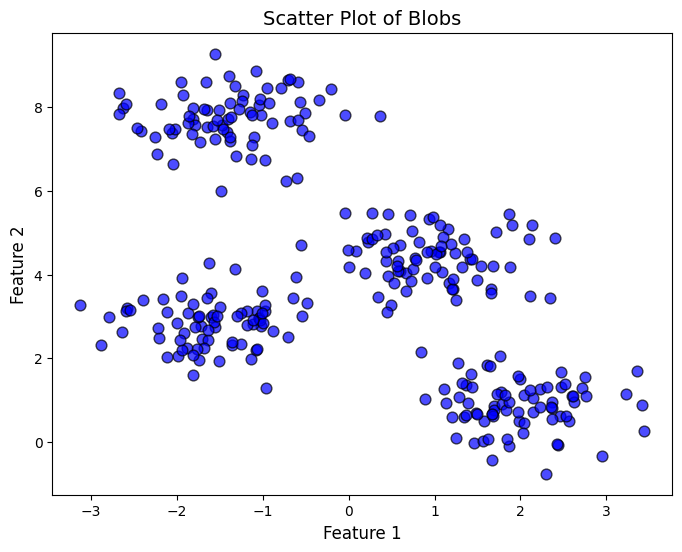

In [2]:
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=60, c='b', alpha=0.7, edgecolor='k')

# Add axis labels and title
plt.title('Scatter Plot of Blobs', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12);

By eye, it is relatively easy to pick out the four clusters. If I were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

In [3]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2])

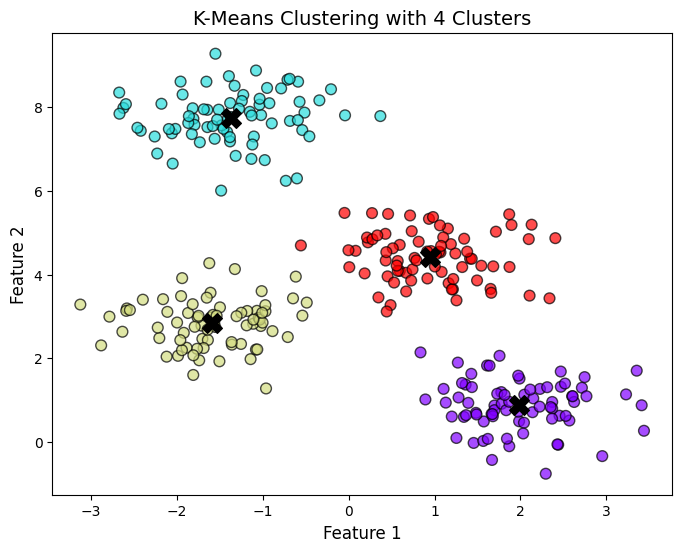

In [4]:

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow', alpha=0.7, edgecolor='k')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering with 4 Clusters', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12);

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

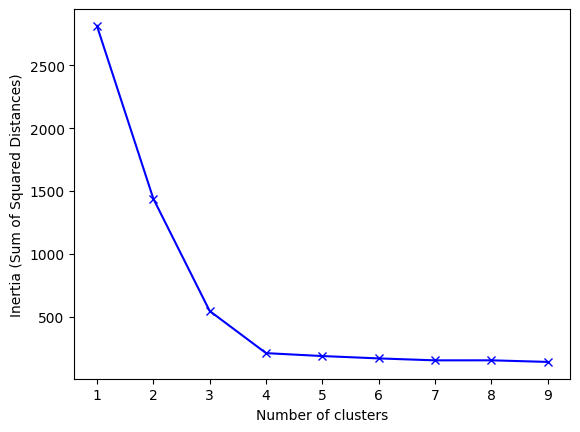

In [5]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of Squared Distances)');

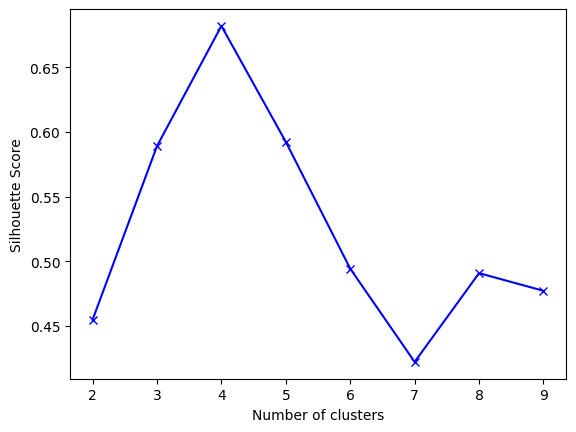

In [6]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
K = range(2, 10)  # Silhouette score requires at least two clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, labels))

# Plot Silhouette Score
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score');

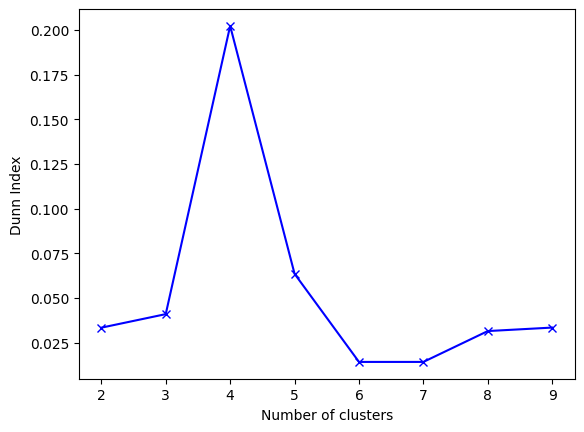

In [7]:
from sklearn.metrics import pairwise_distances

def dunn_index(X, labels):
    clusters = np.unique(labels)
    distances = pairwise_distances(X)

    # Compute intra-cluster distances (max distance within clusters)
    intra_distances = np.zeros(len(clusters))
    for i, cluster in enumerate(clusters):
        points_in_cluster = np.where(labels == cluster)[0]
        if len(points_in_cluster) > 1:
            intra_distances[i] = np.max(distances[points_in_cluster][:, points_in_cluster])

    # Compute inter-cluster distances (min distance between clusters)
    inter_distances = []
    for i, cluster_i in enumerate(clusters):
        for j, cluster_j in enumerate(clusters):
            if i < j:
                points_i = np.where(labels == cluster_i)[0]
                points_j = np.where(labels == cluster_j)[0]
                inter_distances.append(np.min(distances[points_i][:, points_j]))

    return np.min(inter_distances) / np.max(intra_distances)

# Compute Dunn Index for different cluster sizes
dunn_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    dunn_scores.append(dunn_index(X, labels))

# Plot Dunn Index
plt.plot(K, dunn_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Dunn Index');

### $k$-Means Algorithm

$k$-means steps are:

1. Guess some cluster centers
2. Repeat until converged
   - Assign points to the nearest cluster center
   - Set the cluster centers to the mean 

This algorithm will often converge to the optimal cluster centers.

### $k$-Means Caveats

The convergence of this algorithm is not guaranteed; for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.

Also, the number of clusters must be set beforehand. There are other clustering algorithms for which this requirement may be lifted.

## Application of $k$-Means to Digits

For a closer-to-real-world example, let's again take a look at the digits data. Here we'll use $k$-means to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

We see ten clusters in 64 dimensions. Let's visualize each of these cluster centers to see what they represent:

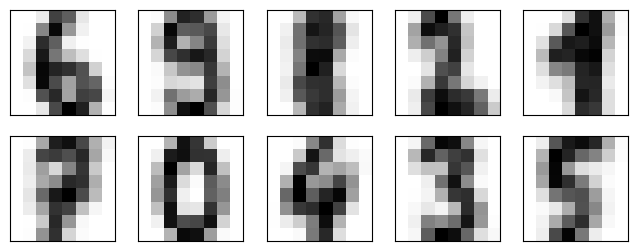

In [10]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

We see that *even without the labels*, $k$-means is able to find clusters whose means are recognizable digits.

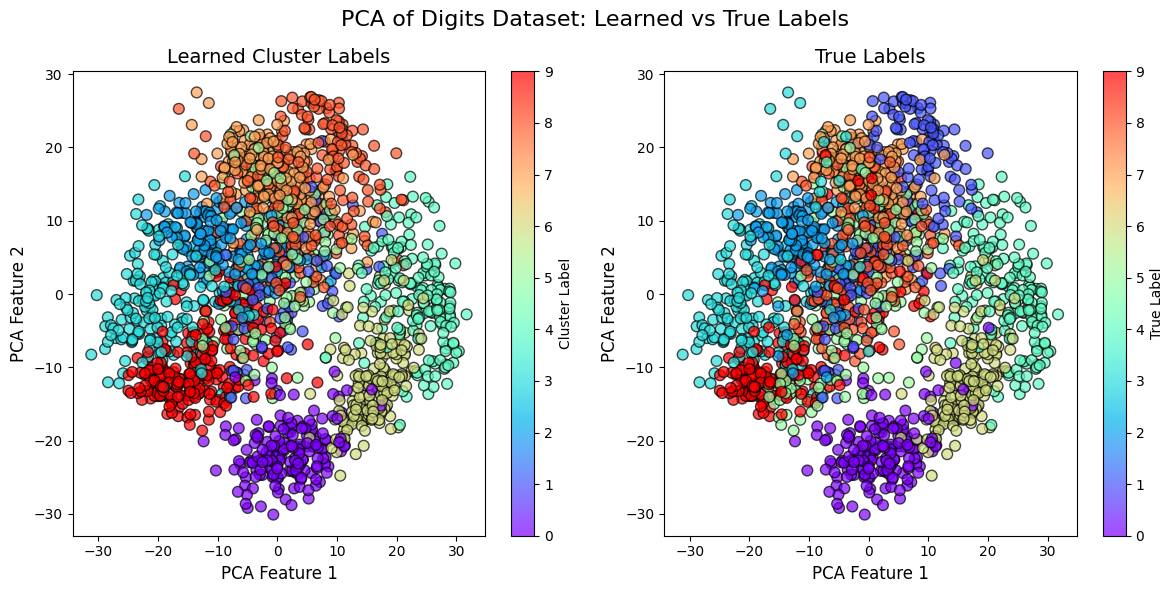

In [11]:
from scipy.stats import mode
from sklearn.decomposition import PCA

# The cluster labels are permuted; let's fix this.
# We map cluster labels to the mode of the true labels in each cluster
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask], keepdims=False)[0]

# Perform PCA to reduce dimensionality to 2D
X = PCA(n_components=2).fit_transform(digits.data)

# Update cmap usage to avoid deprecation warning
kwargs = dict(cmap=plt.colormaps['rainbow'], edgecolor='k', alpha=0.7)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Learned cluster labels plot
scatter_0 = ax[0].scatter(X[:, 0], X[:, 1], c=labels, s=60, **kwargs)
ax[0].set_title('Learned Cluster Labels', fontsize=14)
ax[0].set_xlabel('PCA Feature 1', fontsize=12)
ax[0].set_ylabel('PCA Feature 2', fontsize=12)
fig.colorbar(scatter_0, ax=ax[0], label='Cluster Label')

# True labels plot
scatter_1 = ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, s=60, **kwargs)
ax[1].set_title('True Labels', fontsize=14)
ax[1].set_xlabel('PCA Feature 1', fontsize=12)
ax[1].set_ylabel('PCA Feature 2', fontsize=12)
fig.colorbar(scatter_1, ax=ax[1], label='True Label')

fig.suptitle('PCA of Digits Dataset: Learned vs True Labels', fontsize=16)
plt.tight_layout()

Let's see how accurate our $k$-means model is **with no label information:**

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7918753478018921

79% – not bad! Let's check-out the confusion matrix for this:

[[176   0   0   0   2   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 155   0   2   0   7   7  12]
 [  0   3   0   0 165   0   0  11   2   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   5   0 170   2   0]
 [  0   6   3   2   0   4   2   5 102  50]
 [  0  20   0   6   0   6   0   8   1 139]]


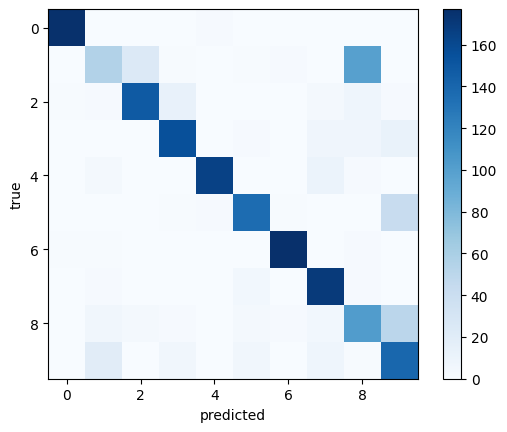

In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

Again, this is an 80% classification accuracy for an **entirely unsupervised estimator** which knew nothing about the labels.

## Example: $k$-Means for Color Compression

One interesting application of clustering is in color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors.

Scikit-learn has a number of images that you can play with, accessed through the datasets module. For example:

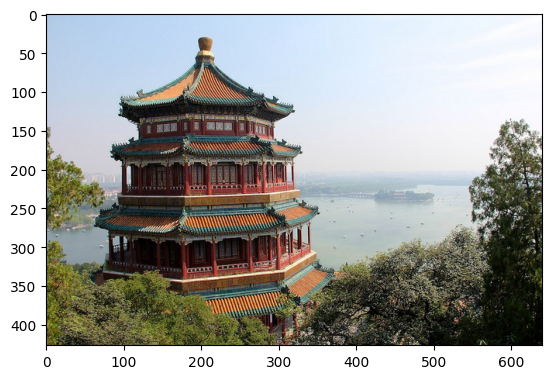

In [21]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);

The image itself is stored in a 3-dimensional array, of size ``(height, width, RGB)``:

In [22]:
china.shape

(427, 640, 3)

We can envision this image as a cloud of points in a 3-dimensional color space. We'll rescale the colors so they lie between 0 and 1, then reshape the array to be a typical scikit-learn input:

In [23]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


We now have 273,280 points in 3 dimensions.

Our task is to use KMeans to compress the $256^3$ colors into a smaller number (say, 64 colors). Basically, we want to find $N_{color}$ clusters in the data, and create a new image where the true input color is replaced by the color of the closest cluster.

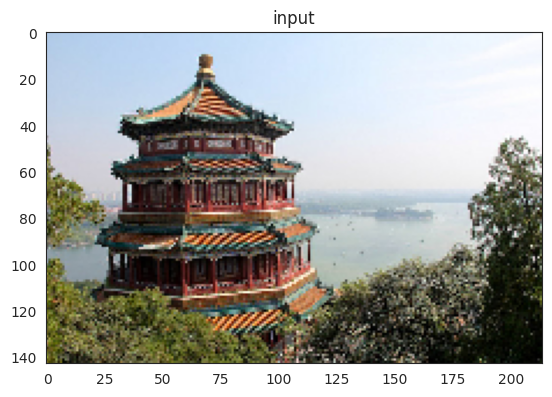

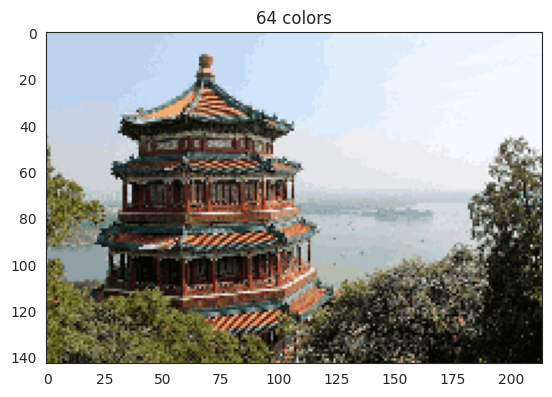

In [24]:
# reduce the size of the image for speed
image = china[::3, ::3]
n_colors = 64

X = (image / 255.0).reshape(-1, 3)
    
model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

Compare the input and output image: we've reduced the $256^3$ colors to just 64.